In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder("./data/", ds_tfms=tfms, size=224, bs=64).normalize(imagenet_stats)

In [4]:
data.classes

['abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'comic_book_guy',
 'edna_krabappel',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lisa_simpson',
 'marge_simpson',
 'mayor_quimby',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'principal_skinner',
 'sideshow_bob']

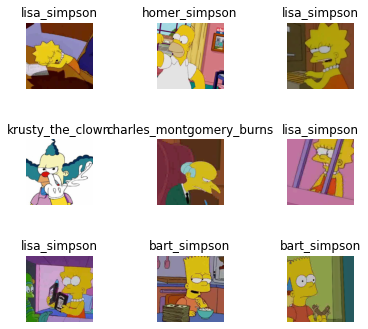

In [5]:
data.show_batch(rows=3, figsize=(5,5))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.030381,0.576393,0.177778,02:33
1,0.543824,0.292696,0.087879,02:33
2,0.405708,0.196000,0.060606,02:34
3,0.324899,0.184624,0.055556,02:34


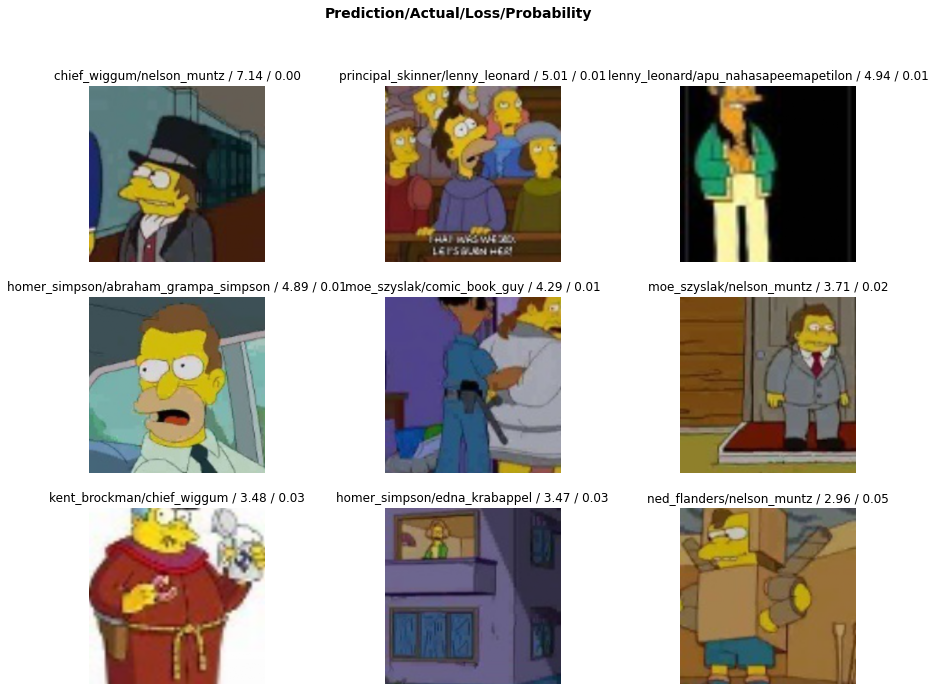

In [7]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_top_losses(9, figsize=(15,11))

In [8]:
interp.most_confused(min_val=2)

[('abraham_grampa_simpson', 'homer_simpson', 3),
 ('edna_krabappel', 'ned_flanders', 3),
 ('lenny_leonard', 'principal_skinner', 3),
 ('milhouse_van_houten', 'krusty_the_clown', 3),
 ('charles_montgomery_burns', 'lisa_simpson', 2),
 ('comic_book_guy', 'principal_skinner', 2),
 ('kent_brockman', 'principal_skinner', 2)]